<a href="https://colab.research.google.com/github/Theresa-Akpan/30-seconds-of-code/blob/master/yield_prediction_ann_modified.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import numpy as np 
import pandas as pd 

In [5]:
import sklearn
import seaborn as sns
import matplotlib.pyplot as plt

In [6]:
yield_df = pd.read_csv('/content/sample_data/cassava_samples1.csv')


In [7]:
yield_df.head()

,loc_ID,W_1_1,W_1_2,W_1_3,W_1_4,W_1_5,W_1_6,W_1_7,W_1_8,W_1_9,W_1_10,W_1_11,W_1_12,W_1_13,W_1_14,W_1_15,W_1_16,W_1_17,W_1_18,W_1_19,W_1_20,W_1_21,W_1_22,W_1_23,W_1_24,W_1_25,W_1_26,W_1_27,W_1_28,W_1_29,W_1_30,W_1_31,W_1_32,W_1_33,W_1_34,W_1_35,W_1_36,W_1_37,W_1_38,W_1_39,...,ocs_mean_100-200cm,phh2o_mean_0-5cm,phh2o_mean_5-15cm,phh2o_mean_15-30cm,phh2o_mean_30-60cm,phh2o_mean_60-100cm,phh2o_mean_100-200cm,sand_mean_0-5cm,sand_mean_5-15cm,sand_mean_15-30cm,sand_mean_30-60cm,sand_mean_60-100cm,sand_mean_100-200cm,silt_mean_0-5cm,silt_mean_5-15cm,silt_mean_15-30cm,silt_mean_30-60cm,silt_mean_60-100cm,silt_mean_100-200cm,soc_mean_0-5cm,soc_mean_5-15cm,soc_mean_15-30cm,soc_mean_30-60cm,soc_mean_60-100cm,soc_mean_100-200cm,P_1,P_2,P_3,P_4,P_5,P_6,P_7,P_8,P_9,P_10,P_11,P_12,P_13,P_14,yield
0,0,0.274725,0.000000,1.615385,0.395604,0.967033,0.736264,1.153846,0.351648,0.615385,0.978022,1.868132,3.175824,6.472527,1.736264,5.505495,0.648352,0.000000,0.000000,1.153846,8.769231,1.659341,7.527473,5.000000,1.384615,0.472527,0.791209,6.989011,0.021978,2.241758,2.538462,0.362637,6.175824,10.252747,0.923077,6.318681,11.428571,4.065934,4.230769,0.000000,...,57.735324,62.645905,62.449185,59.849164,57.664487,58.52071,63.943943,82.025226,77.579051,75.449081,71.287968,74.635108,103.98557,616.612997,609.275408,589.619433,551.298038,542.602408,531.98038,282.2865,159.58348,104.991802,72.170593,36.379682,20.65674,0,0,0,29,22,22,0,23,3,0,0,0,0,0,32.5
1,0,0.604396,0.000000,0.043956,0.000000,0.857143,1.824176,0.000000,2.340659,1.285714,1.263736,0.000000,0.197802,1.593407,0.670330,11.934066,5.417582,2.241758,1.450549,7.120879,14.703297,3.505495,2.648352,1.670330,8.010989,9.439560,5.571429,15.417582,4.758242,8.340659,19.296703,0.571429,2.087912,2.395604,0.879121,5.538462,1.516484,1.131868,0.000000,4.252747,...,57.735324,62.645905,62.449185,59.849164,57.664487,58.52071,63.943943,82.025226,77.579051,75.449081,71.287968,74.635108,103.98557,616.612997,609.275408,589.619433,551.298038,542.602408,531.98038,282.2865,159.58348,104.991802,72.170593,36.379682,20.65674,0,0,0,7,1,13,15,27,15,10,6,4,0,0,36.0
2,0,2.098901,0.384615,1.681319,0.527473,6.340659,1.593407,1.868132,1.395604,4.076923,1.362637,5.604396,3.296703,1.483516,5.857143,0.923077,5.692308,0.329670,0.945055,0.439560,5.329670,8.714286,4.351648,9.483516,2.461538,3.065934,3.956044,12.560440,3.131868,8.835165,0.791209,0.000000,5.483516,2.032967,1.956044,7.769231,0.626374,2.406593,4.472527,0.000000,...,57.735324,62.645905,62.449185,59.849164,57.664487,58.52071,63.943943,82.025226,77.579051,75.449081,71.287968,74.635108,103.98557,616.612997,609.275408,589.619433,551.298038,542.602408,531.98038,282.2865,159.58348,104.991802,72.170593,36.379682,20.65674,0,0,14,31,22,13,2,8,5,3,1,1,0,0,37.0
3,0,0.000000,0.000000,0.000000,1.032967,4.373626,0.351648,0.263736,0.000000,0.000000,3.868132,0.098901,1.879121,7.076923,11.219780,3.571429,0.879121,2.406593,9.406593,2.098901,2.560440,4.219780,3.318681,0.340659,0.791209,0.780220,0.637363,1.494505,0.000000,0.000000,0.131868,2.912088,0.263736,0.000000,4.505495,1.560440,0.076923,8.901099,3.120879,0.593407,...,57.735324,62.645905,62.449185,59.849164,57.664487,58.52071,63.943943,82.025226,77.579051,75.449081,71.287968,74.635108,103.98557,616.612997,609.275408,589.619433,551.298038,542.602408,531.98038,282.2865,159.58348,104.991802,72.170593,36.379682,20.65674,0,0,0,5,16,24,22,14,16,2,1,0,0,0,23.0
4,0,0.000000,0.043956,0.197802,0.461538,0.142857,0.670330,4.615385,1.197802,1.109890,1.758242,8.329670,5.351648,3.252747,2.868132,4.945055,3.098901,2.956044,6.010989,0.142857,3.527473,12.439560,1.901099,10.483516,1.868132,0.329670,1.560440,3.296703,2.912088,8.285714,5.351648,0.000000,0.000000,2.054945,0.021978,0.307692,1.021978,13.450549,0.648352,3.593407,...,57.735324,62.645905,62.449185,59.849164,57.664487,58.52071,63.943943,82.025226,77.579051,75.449081,71.287968,74.635108,103.98557,616.612997,609.275408,589.619433,551.298038,542.602408,531.98038,282.2865,159.58348,104.991802,72.170593,36.3

In [8]:
from sklearn.preprocessing import MinMaxScaler


In [9]:

features1=yield_df.loc[:, yield_df.columns != 'yield']
label=yield_df['yield']
scaler=MinMaxScaler()
features=scaler.fit_transform(features1)

#yield_df.drop(['Area'])

In [10]:
from sklearn.model_selection import train_test_split
train_data, test_data, train_labels, test_labels = train_test_split(features1, label, test_size=0.3, random_state=42)

In [11]:
train_data.shape
train_labels.shape

(1049,)

In [12]:
from keras.models import Sequential
from keras.layers import Dense
ann = Sequential()

ann.add(Dense(393,activation='relu'))
ann.add(Dense(393,activation='relu'))
ann.add(Dense(200,activation='relu'))
ann.add(Dense(100,activation='relu'))
ann.add(Dense(50,activation='relu'))
ann.add(Dense(25,activation='relu'))
ann.add(Dense(10,activation='relu'))

ann.add(Dense(1))
ann.compile(optimizer='adam',loss='mse')



In [13]:
ann.fit(x=train_data,y=train_labels,
          validation_data=(test_data,test_labels),
          batch_size=16,epochs=400)

Epoch 1/400
66/66 [==============================] - 2s 12ms/step - loss: 4247.2866 - val_loss: 91.8633
Epoch 2/400
66/66 [==============================] - 0s 7ms/step - loss: 130.2554 - val_loss: 168.2297
Epoch 3/400
66/66 [==============================] - 0s 6ms/step - loss: 93.8902 - val_loss: 111.2803
Epoch 4/400
66/66 [==============================] - 0s 6ms/step - loss: 106.1930 - val_loss: 61.0097
Epoch 5/400
66/66 [==============================] - 0s 6ms/step - loss: 85.0808 - val_loss: 52.4391
Epoch 6/400
66/66 [==============================] - 0s 7ms/step - loss: 85.1282 - val_loss: 124.6069
Epoch 7/400
66/66 [==============================] - 0s 7ms/step - loss: 79.2302 - val_loss: 104.0866
Epoch 8/400
66/66 [==============================] - 0s 6ms/step - loss: 76.6834 - val_loss: 41.4081
Epoch 9/400
66/66 [==============================] - 0s 6ms/step - loss: 48.1411 - val_loss: 65.3298
Epoch 10/400
66/66 [==============================] - 0s 6ms/step - loss: 61.0281 

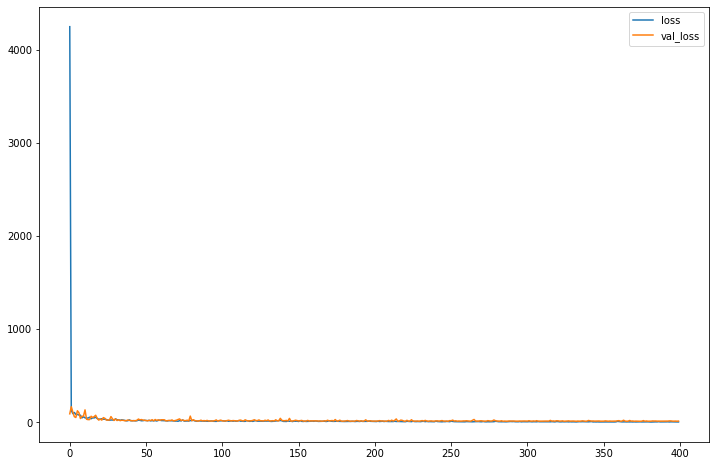

In [14]:
loss_df = pd.DataFrame(ann.history.history)
loss_df.plot(figsize=(12,8))

In [15]:
y_pred = ann.predict(test_data)
from sklearn.metrics import r2_score
r2=r2_score(test_labels,y_pred)
print("score")
print(r2)

score
0.8667006957866643


In [16]:
y_pred[0]

array([42.106438], dtype=float32)

In [17]:
test_labels1=np.array(test_labels)
test_labels1[1]

35.0

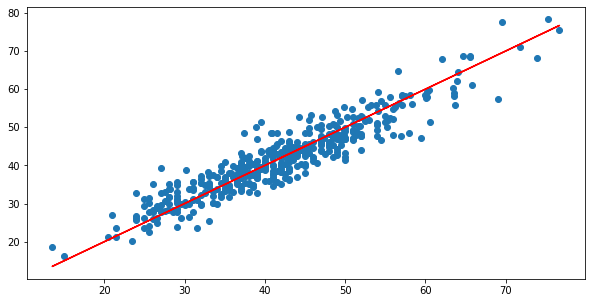

In [18]:
# Our predictions
fig = plt.figure(figsize=(10,5))
plt.scatter(test_labels,y_pred)
# Perfect predictions
plt.plot(test_labels,test_labels,'r')

In [19]:
from sklearn import metrics


print('Root Mean Squared Error: {:.2f}'.format(np.sqrt(metrics.mean_squared_error(test_labels, y_pred))))


Root Mean Squared Error: 3.69


In [20]:
y_pred = np.ravel(y_pred)


In [21]:


df = pd.DataFrame({'Actual': test_labels1, 'Predicted': y_pred})
df1 = df.head(10)
df1


,Actual,Predicted
0,46.0,42.106438
1,35.0,33.591778
2,39.5,43.891117
3,60.2,59.243763
4,60.1,57.661499
5,52.8,55.311523
6,33.5,30.186005
7,57.4,58.200413
8,49.3,51.600441
9,55.2,49.997940


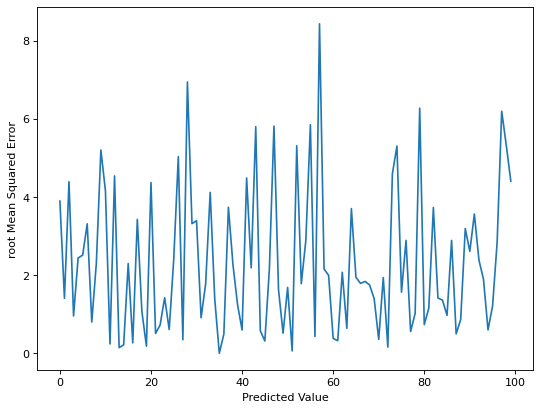

In [22]:


import math 
from matplotlib import pyplot
from sklearn.metrics import mean_squared_error
errors = list()
for i in range(100):
	# calculate error
	err = math.sqrt((test_labels1[i] - y_pred[i])**2)
  
	# store error
	errors.append(err)
	# report error
	#print('>%.1f, %.1f = %.3f' % (expected[i], predicted[i], err))
# plot errors

pyplot.figure(figsize=(8, 6), dpi=80)
pyplot.plot(errors)
pyplot.xlabel('Predicted Value')
pyplot.ylabel('root Mean Squared Error')
pyplot.show()